# Katrina Tang

## Research question/interests

**My part of the project will be looking further into the demographic of Canadian metropolitan areas.**

### I changed my research question to just focus on age demographic of metropolitans instead of both gender and age.

I will be analyzing the age ranges of 20-39, 40-59 and then 60-79 within Canadian metropolitians.
I will be visualizing age groups within canadian cities and analyzing their distributions within the top 5 cites of the highest age disttribution. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append('..')
from scripts import project_functions3 as pf3

sns.set_theme(style='whitegrid', font_scale=2)

PE_Wrangled = pd.read_csv("../data/processed/PE_Wrangled_Final.csv")


Logan Hernandez, my team member, graceously wrangled the data and processed a final version of the Population dataset. 


## EDA

In [2]:
PE_age = PE_Wrangled.sort_values('Age group').reset_index()
PE_age = PE_Wrangled.drop(columns=['Unnamed: 0'])
PE_age.head(5)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 to 4 years,Persons,9317.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 years,Persons,1839.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,1 year,Persons,1880.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,2 years,Persons,1785.0


In [3]:
groups = sorted(PE_Wrangled['Age group'].unique().tolist())

From this method chain, I can see the groups of ages within the data set. 

In [4]:
age_values = ['20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
              '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years',
              '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years']
PE_Wrangled = PE_Wrangled[PE_Wrangled['Age group'].isin(age_values)]
PE_Wrangled = PE_Wrangled.reset_index(drop=True)
PE_Wrangled = PE_Wrangled.drop(columns=['Unnamed: 0'])
PE_Wrangled.head(5)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,20 to 24 years,Persons,14642.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,25 to 29 years,Persons,13039.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,30 to 34 years,Persons,13631.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,35 to 39 years,Persons,15269.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,40 to 44 years,Persons,14961.0


In [5]:
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled['Sex'] != 'Both sexes'].index)
PE_Wrangled.head(5)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,20 to 24 years,Persons,14642.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,25 to 29 years,Persons,13039.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,30 to 34 years,Persons,13631.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,35 to 39 years,Persons,15269.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,40 to 44 years,Persons,14961.0


In [6]:
pf3.age_grouper()

,Age group,total_count
0,20-24,67364268.0
1,25-29,70056790.0
2,30-34,70009228.0
3,35-39,70366854.0
4,40-44,71109018.0
5,45-49,70366604.0
6,50-54,67366224.0
7,55-59,60908430.0
8,60-64,50822634.0
9,65-69,40816246.0


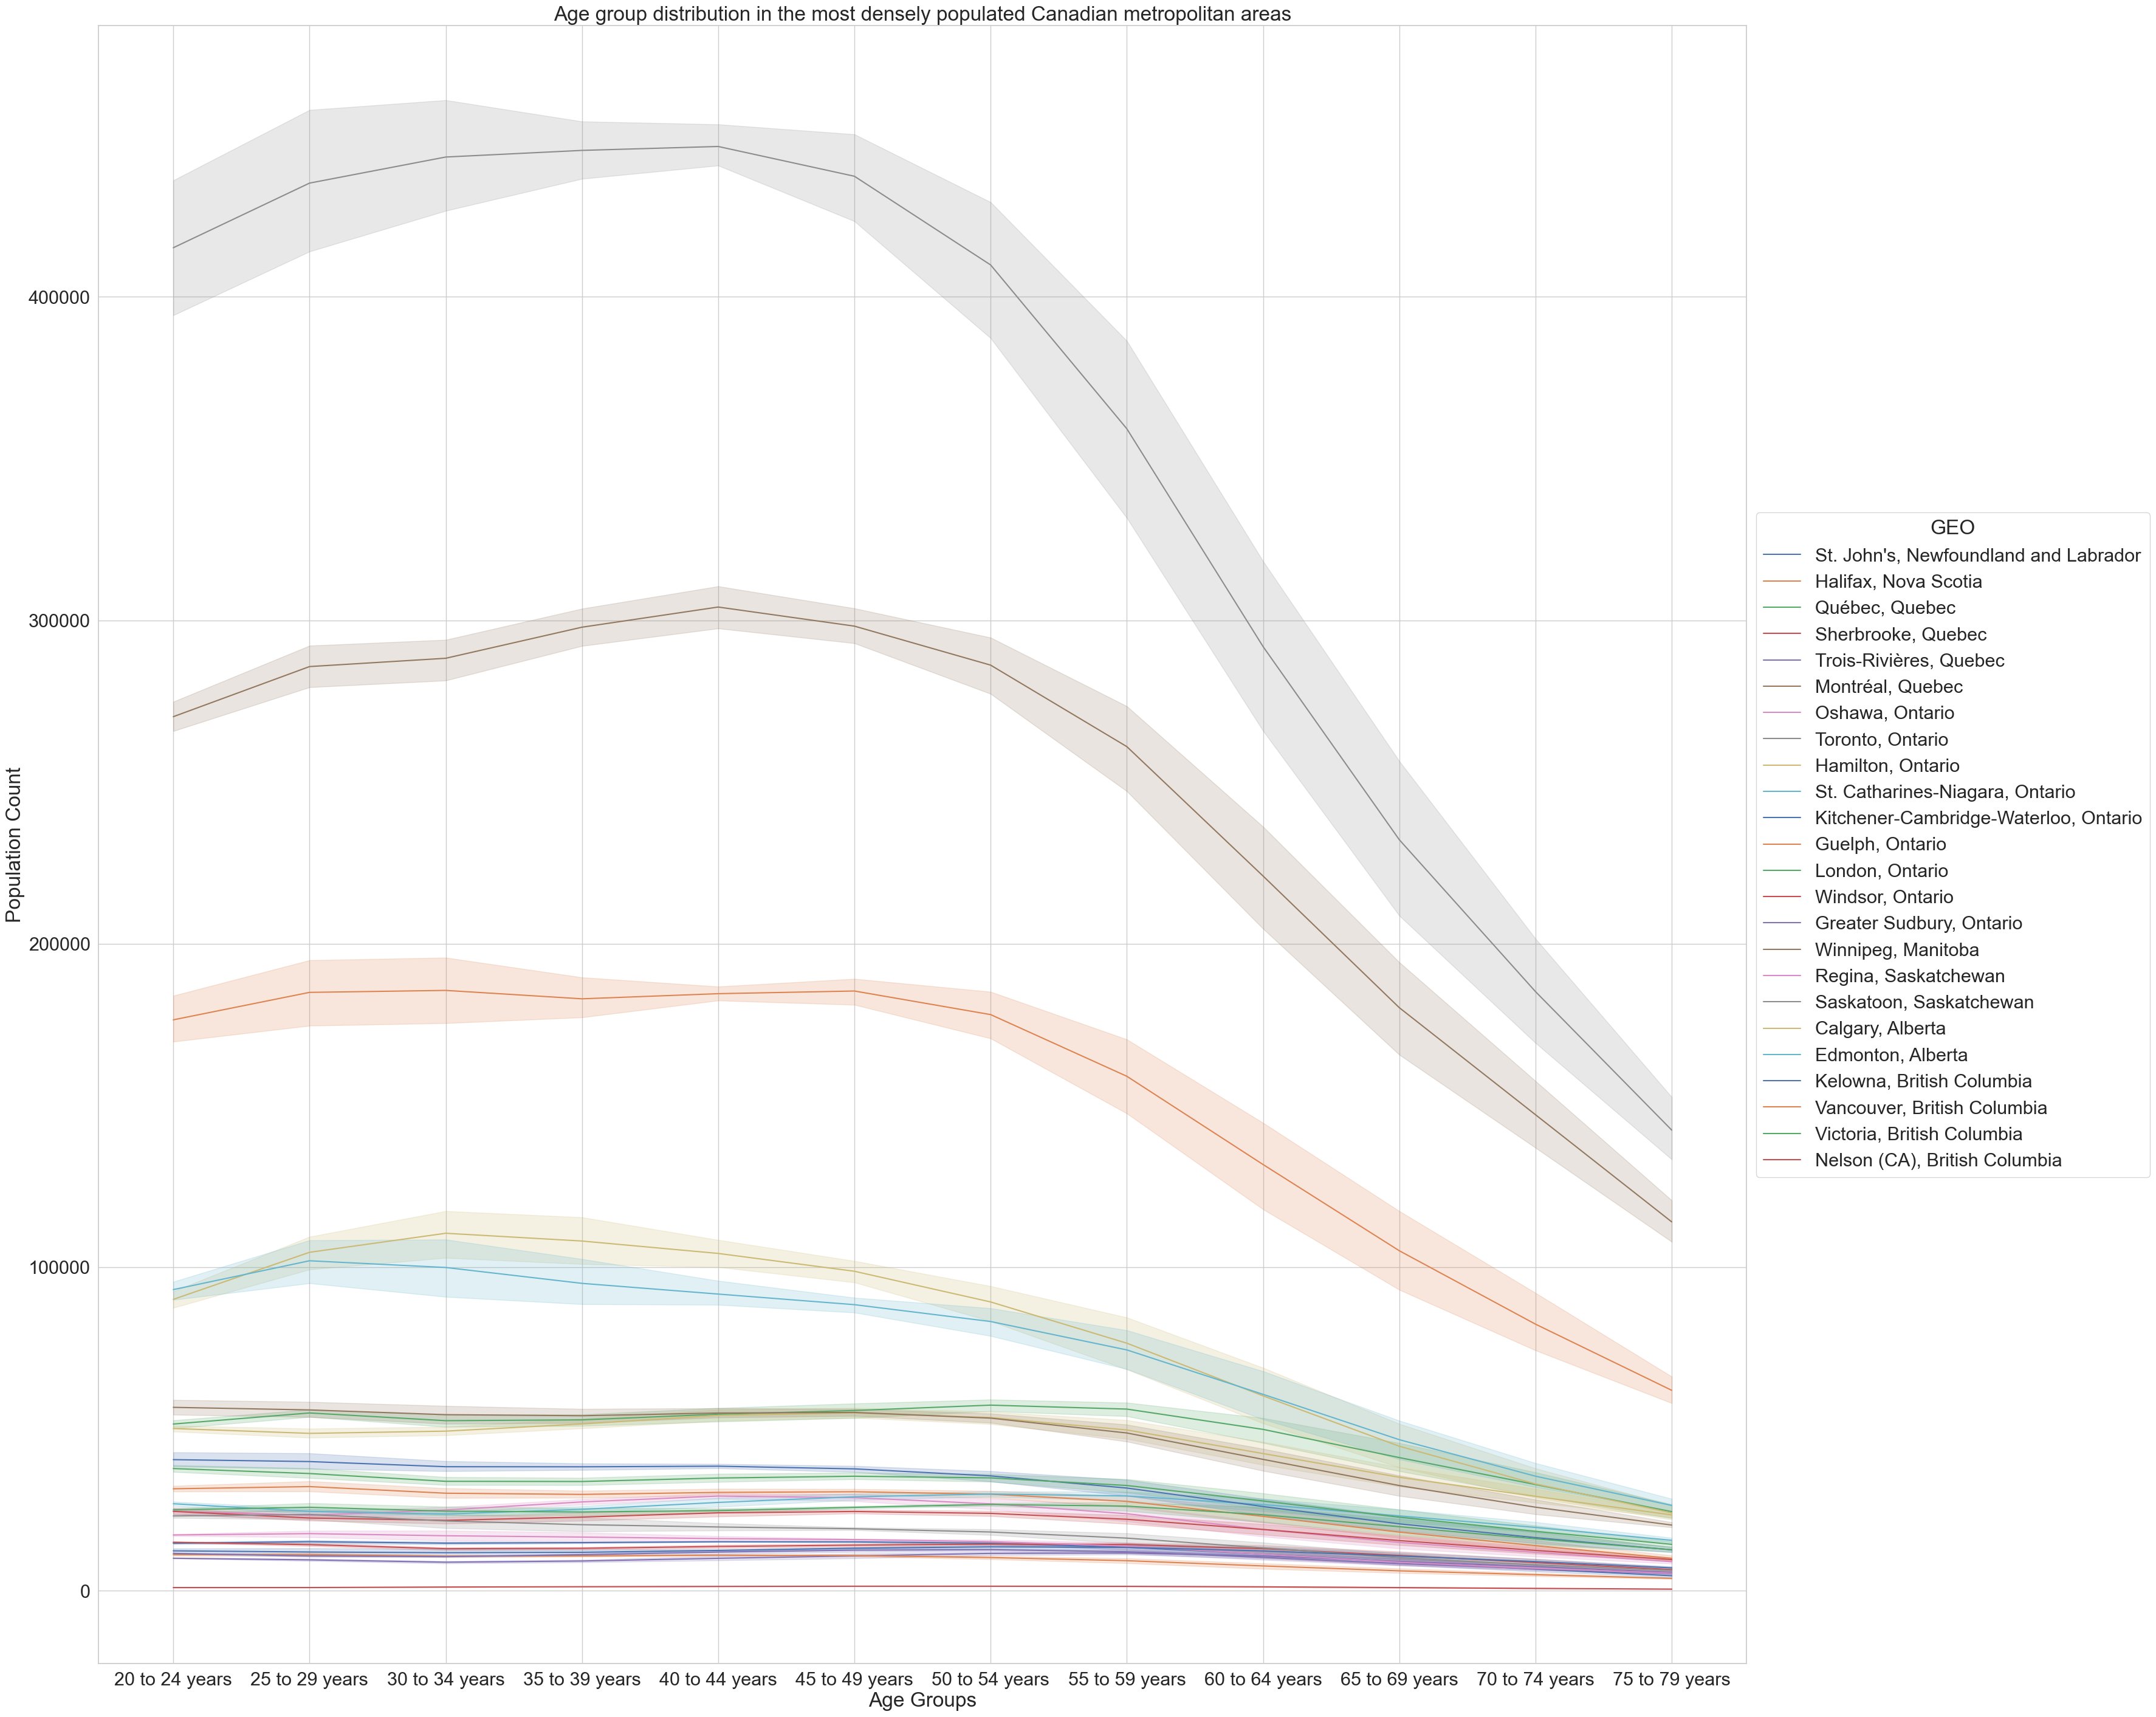

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(35,35))

pop = sns.lineplot(x='Age group', y='VALUE', hue='GEO', data=PE_Wrangled, palette='deep')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Age Groups")
plt.ylabel("Population Count")
plt.title("Age group distribution in the most densely populated Canadian metropolitan areas")
plt.show()

This plot shows me the different amounts of population with respect to age groups within the compared canadian cites. I can see which top 5 cities that have high populations and the distribution of the cities age groups within. Unfortunately, this is too broad and I want to narrow it down to the top 5 cities with the highest total count of age groups, not based on how high their population is. 

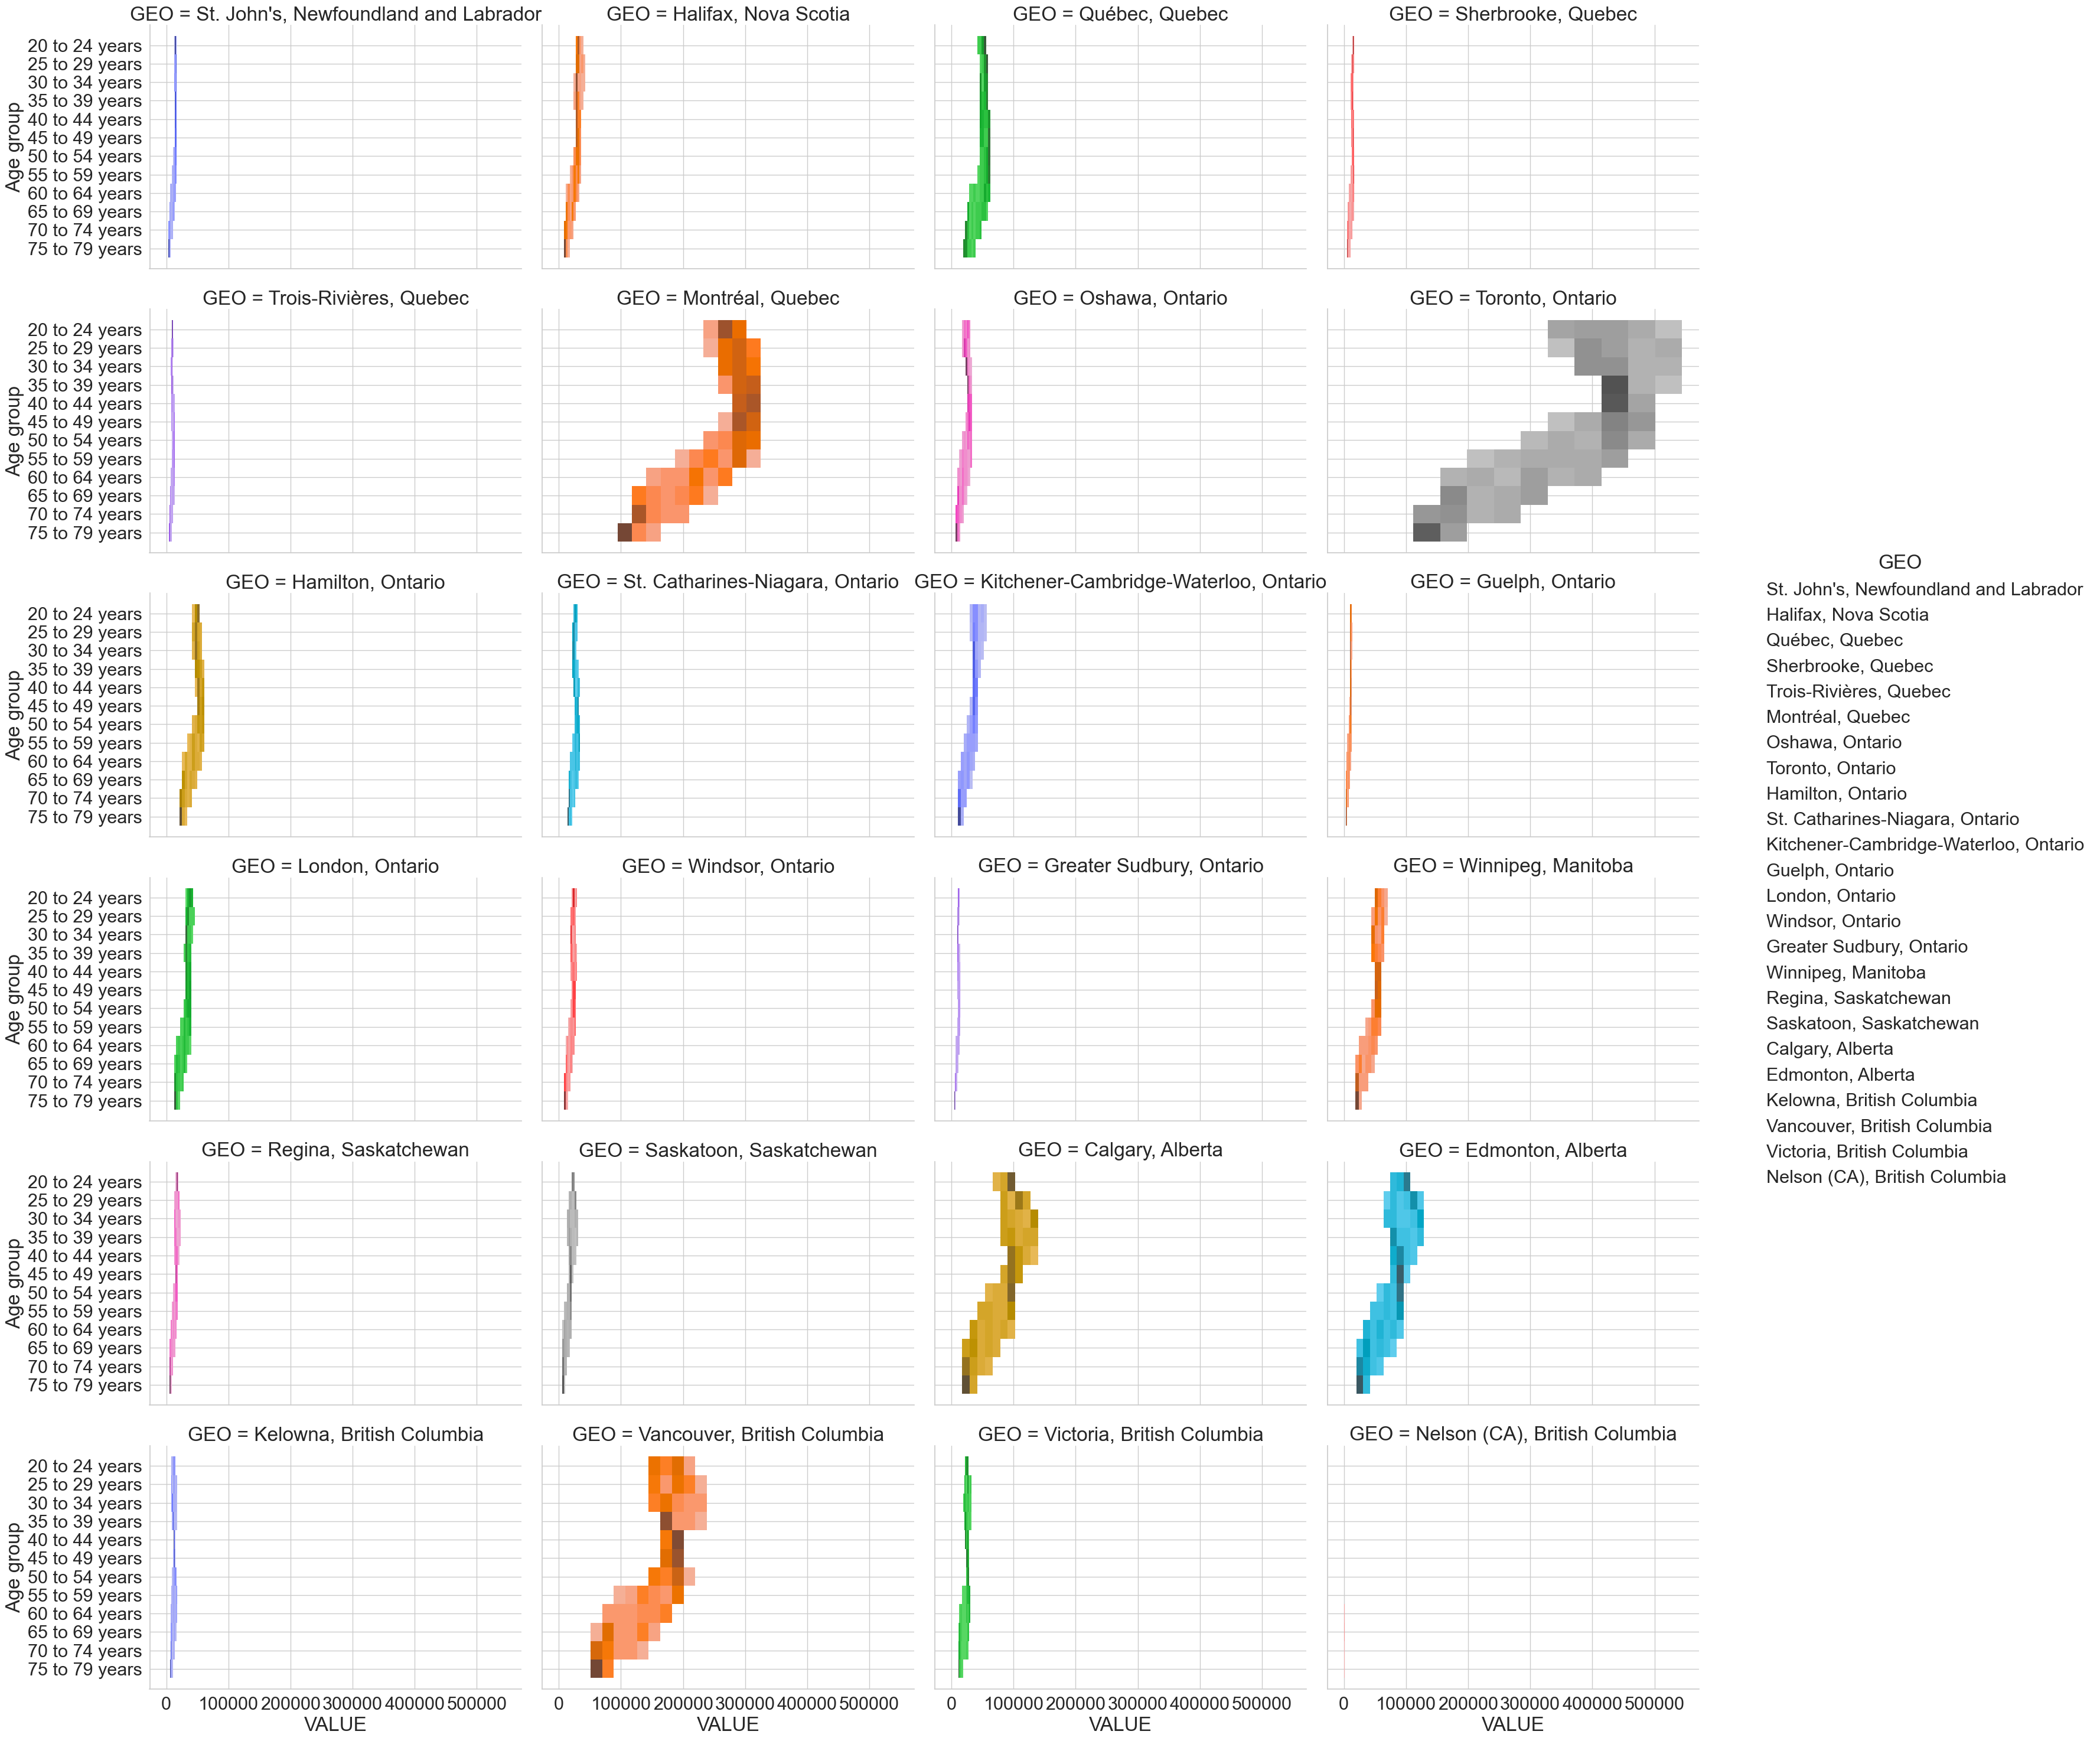

In [8]:
facet = sns.FacetGrid(PE_Wrangled, col='GEO', hue='GEO', col_wrap=4, height=5, aspect=1.5, palette='bright')

facet.map(sns.histplot, 'VALUE', 'Age group')
facet.add_legend()
plt.show()

From this narrowed down graph, I can see which cities have the highest counts of different age groups that is NOT based on the cities population. The top 5 cities that have the highest count of age groups would be Vancouver, Calgary, Edmonton, Toronto and Montreal. 

In [9]:
selected_cities = ['Vancouver, British Columbia', 'Calgary, Alberta', 'Edmonton, Alberta', 'Toronto, Ontario', 'Montréal, Quebec']
filtered_df = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities)]
filtered_df.head(5)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
180,2001-01-01,"Montréal, Quebec",Both sexes,20 to 24 years,Persons,261069.0
181,2001-01-01,"Montréal, Quebec",Both sexes,25 to 29 years,Persons,254750.0
182,2001-01-01,"Montréal, Quebec",Both sexes,30 to 34 years,Persons,269964.0
183,2001-01-01,"Montréal, Quebec",Both sexes,35 to 39 years,Persons,316527.0
184,2001-01-01,"Montréal, Quebec",Both sexes,40 to 44 years,Persons,317236.0


I am using cat plots because it visualizes the relationship between categorical (the age groups) and numerical variables (value, AKA.population count) within the Popestimate dataset I am using. 

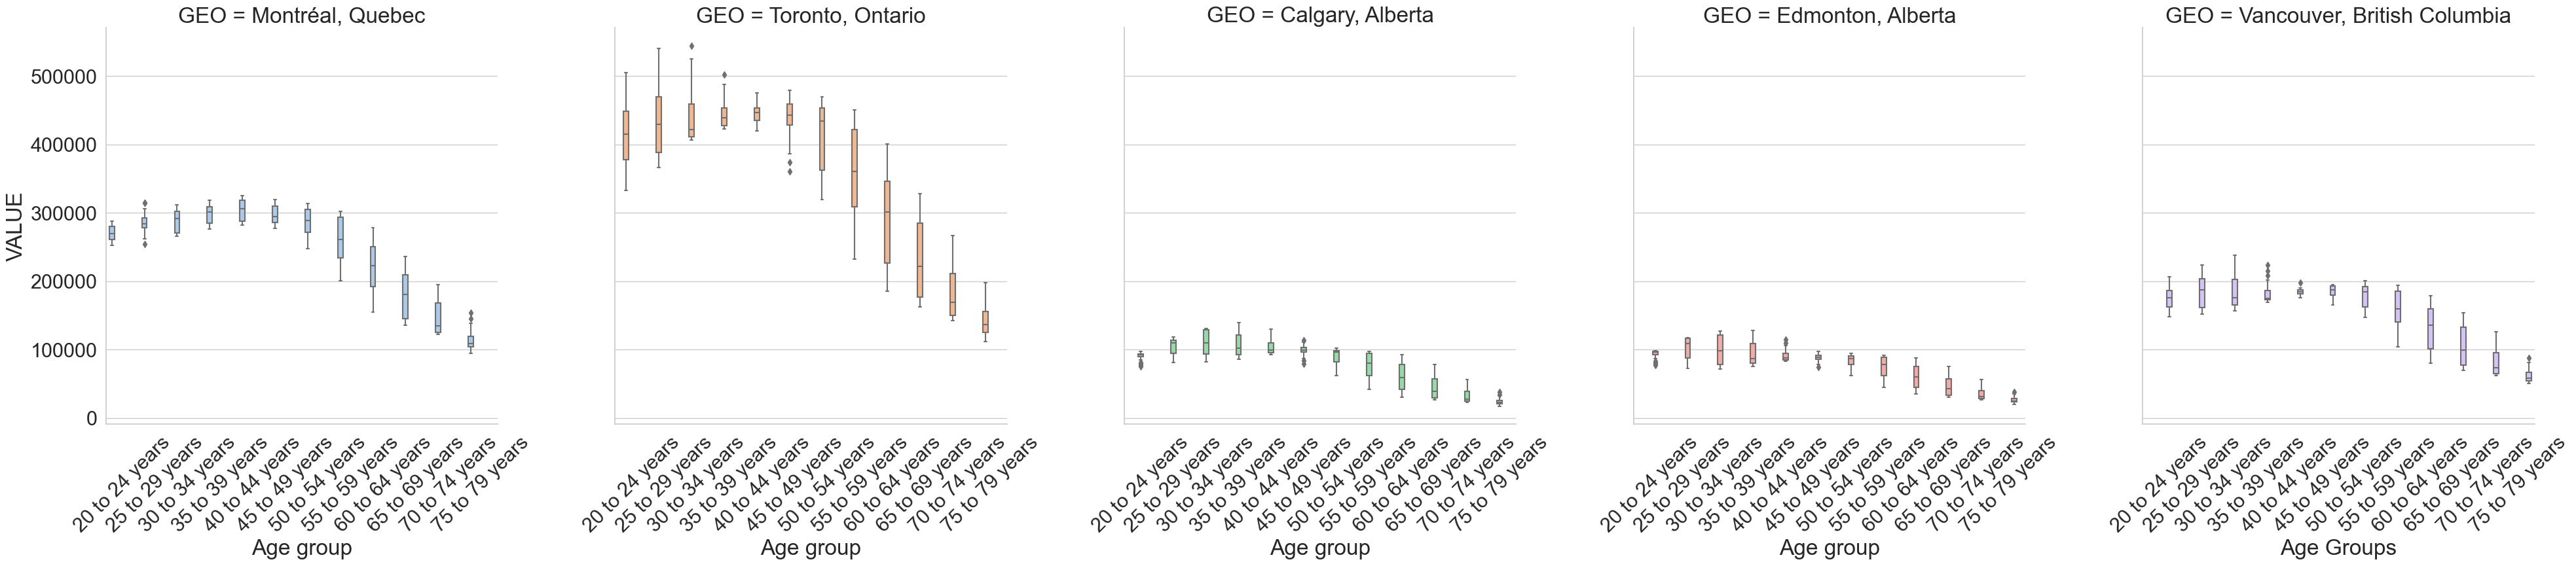

In [10]:
g = sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df, height=8, aspect=1, col="GEO", palette='pastel')

g.set_xticklabels(rotation=45)
plt.xlabel("Age Groups")
plt.ylabel("Population ")
plt.subplots_adjust(top=0.9, hspace=.1, wspace=.3)

plt.show()

I split the graphs up into the top 5 cities with a high count of total age groups. The plots above show the cities with the highest count of age groups within the specified canadian city. These graphs show a great comparative data between the top 5 cities but, I will make them to be indvidual graphs on their own, so I can get a better handle on each cities demographics. 

## Based on a facet grid I previously made, the highest city with total count of age group is Toronto. In descending order it then goes Montreal, Vancouver, Calgary then finally, Edmonton. 

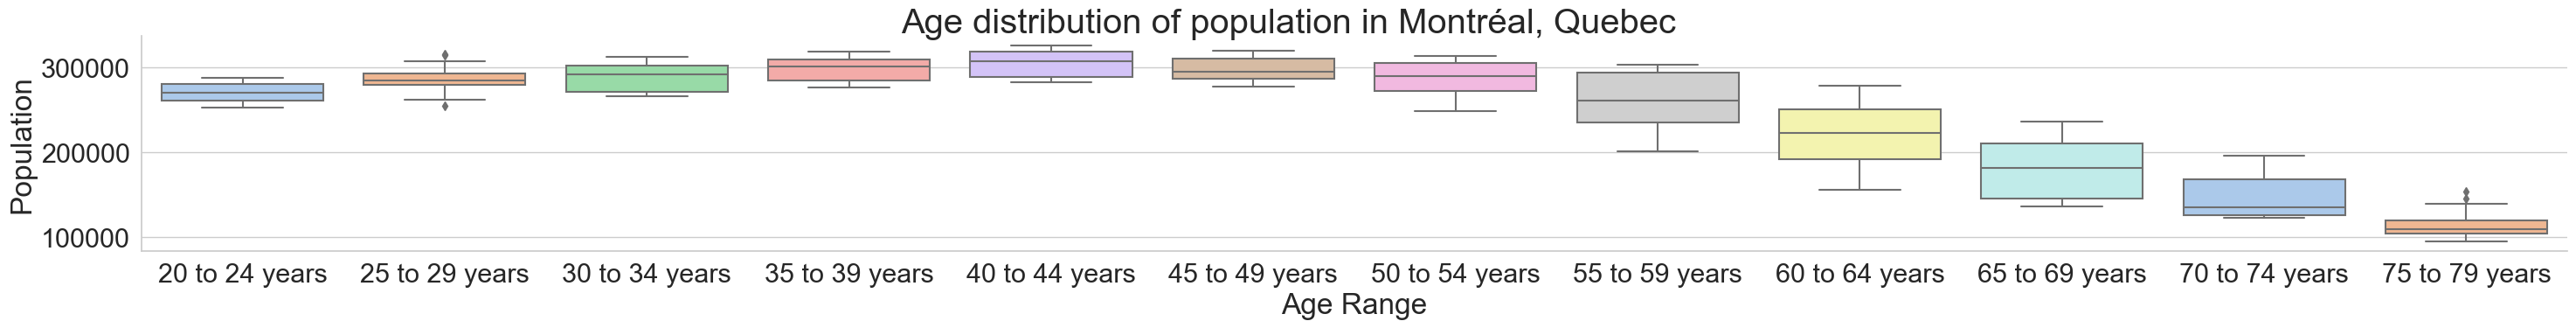

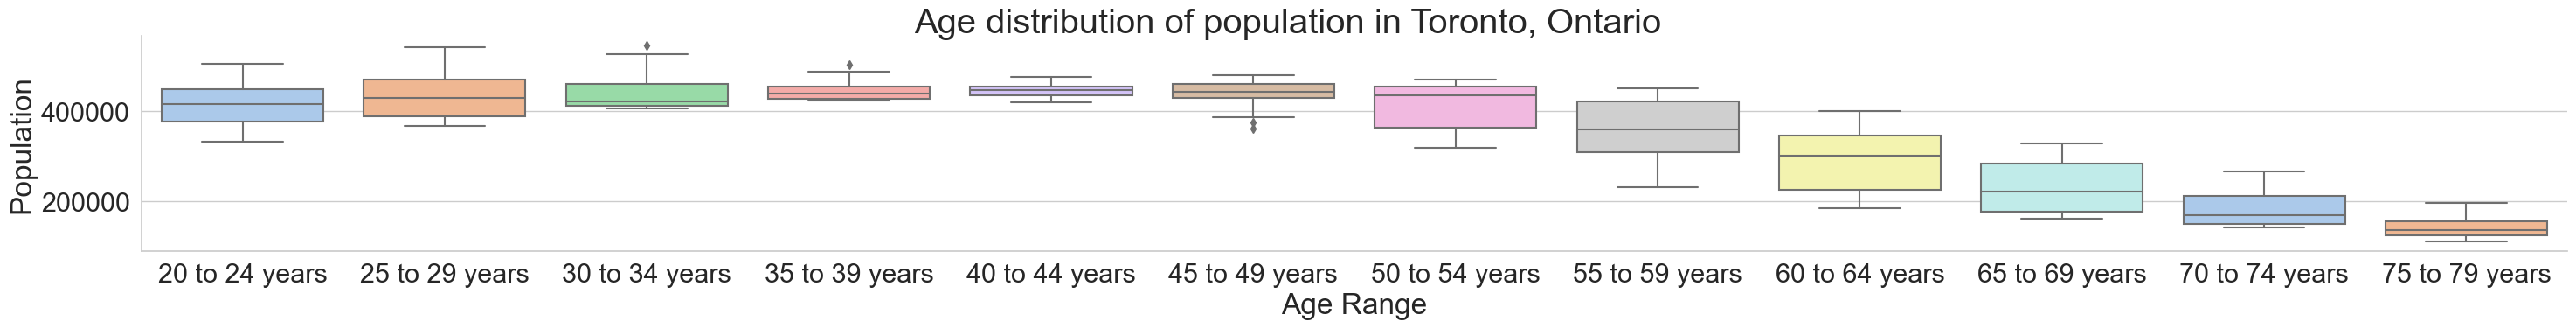

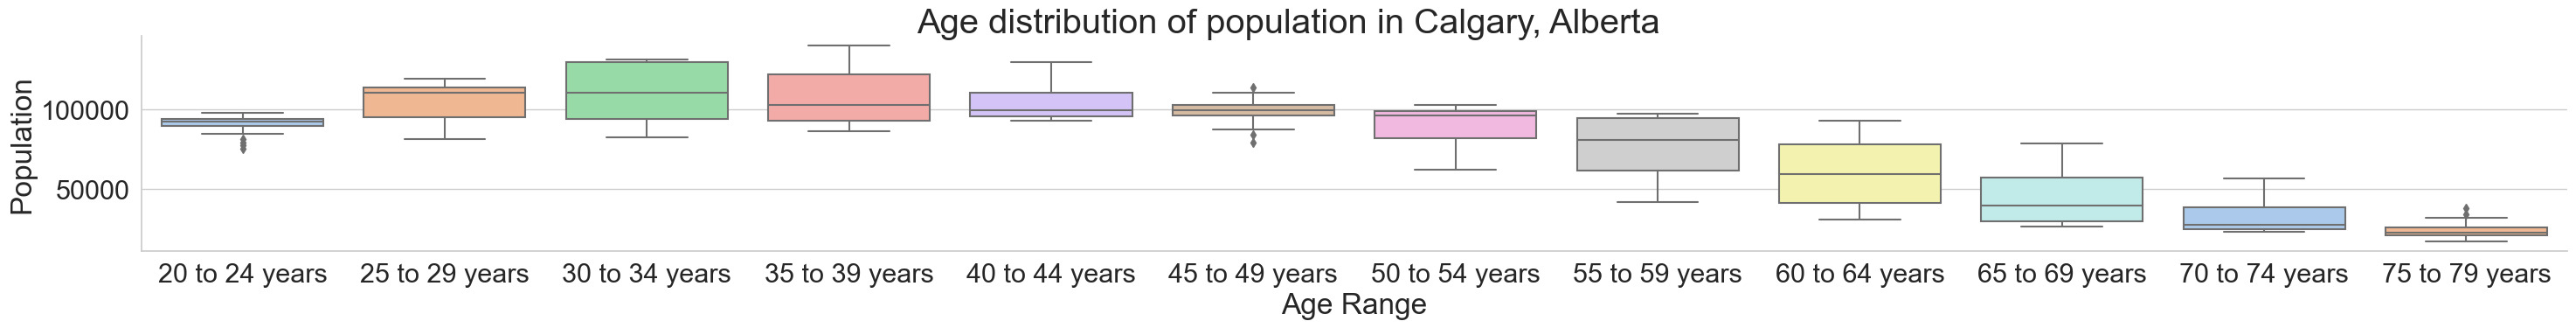

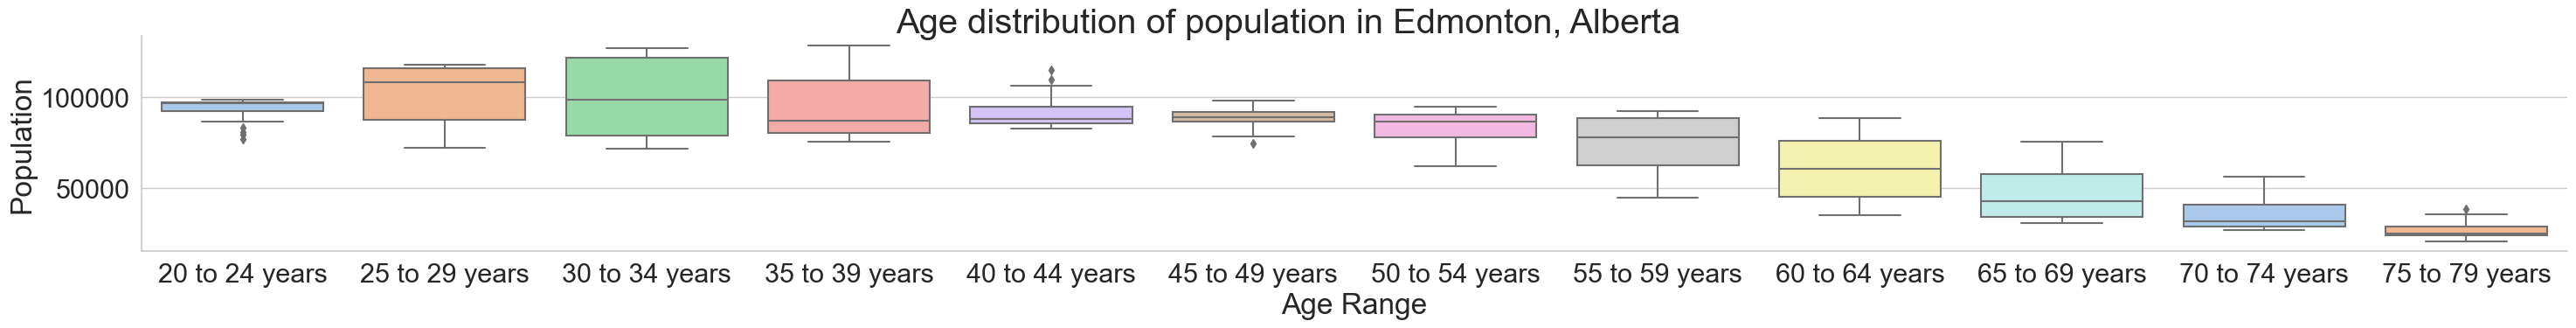

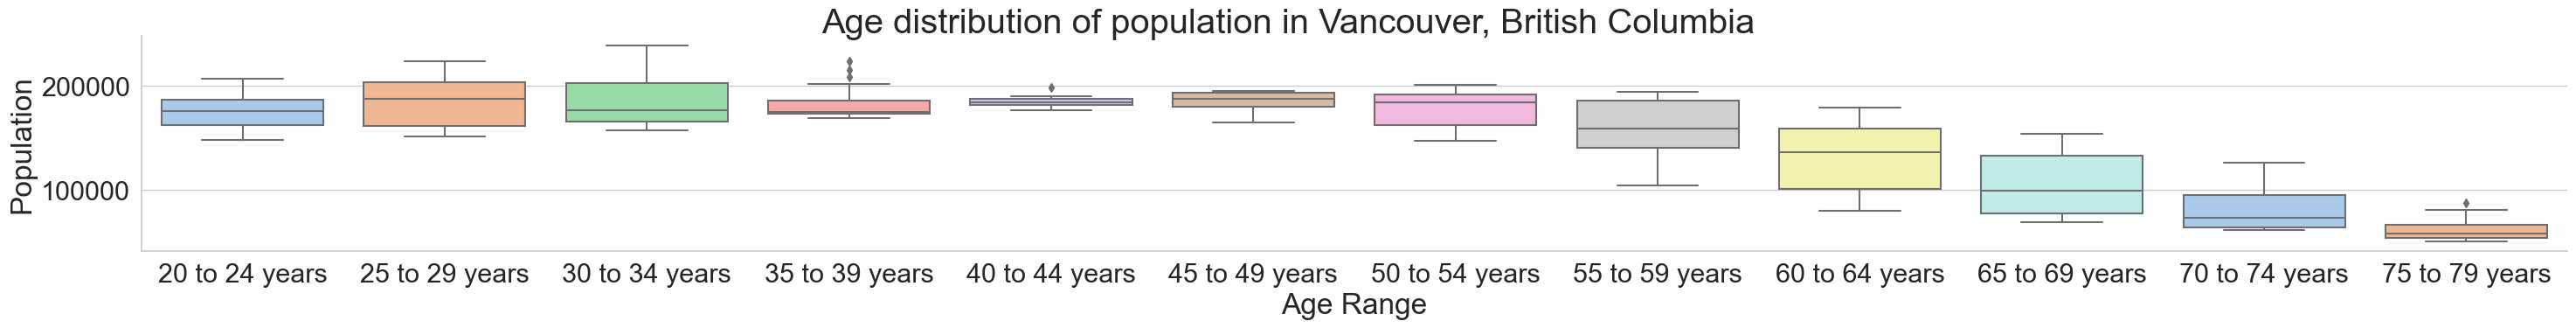

In [11]:
pf3.plot_age_distribution(filtered_df)

Based on this graph made for Toronto, they have a high count of ages 40-44 but then it tapers off gradually as the ages increase. The ages 40-44 show to be the age group that has the highest count in Toronto. The ages groups of 50-79 have a steep decline in count. In comparison to all the top 5 cities chosen, Toronto has the highest count of population. 

Based on this graph made for Montreal, they have a lower total population count in comparison to Toronto (as seen from my Y axis, population), and their age groups within the city show a much different age demograpihc trend. However, the age group 40-44 is similar to Toronto, where this age group has the highest count. The ages 20-39 have a gradual increase in total count as they reach 40 years old. The ages groups of 50-79 have a steep decline in count as the ages increase. 

In Vancouver, the age group 25-29 have the highest count in the population, this is quite different from Toronto and Montreal as there is a 20 year age difference. The ages 40-49 are also at the highest count (this age groups whisker is level to the whisker for the 25-29 age group), but their upper and lower quartiles are much smaller than the 25-29 age group. From there as the ages increase, the counts decreases
significantly. 

In this graph made for Calgary, the highest count in the population is the age group 25-34. The age group 25-29's whisker is level to the the age group for 30-34 but the quartiles (for 25-29) are much smaller. As the ages increase, the count gradually decreases, where 75-79 have the lowest count in the total population. 

When I look at the Calgary versus Edmonton graphs they are quite similar! My assumption for this may be due to the fact that both of these cities are in the same province. The only difference I see, would be that the total count for individual age groups in the population is slightly smaller (as their total population is smaller), and the age group 25-29 have the highest count in the population. Both of these cities show the same trend in demographics. 

#### Stacked bar chart that shows a comparison of all the top 5 Canadian cities chosen. 

Even though individual analysis (cat plots above) of each city is very insighful to the trend within that city, it is crucial to compare them as a whole because it shows a comparative analysis side-by-side. 

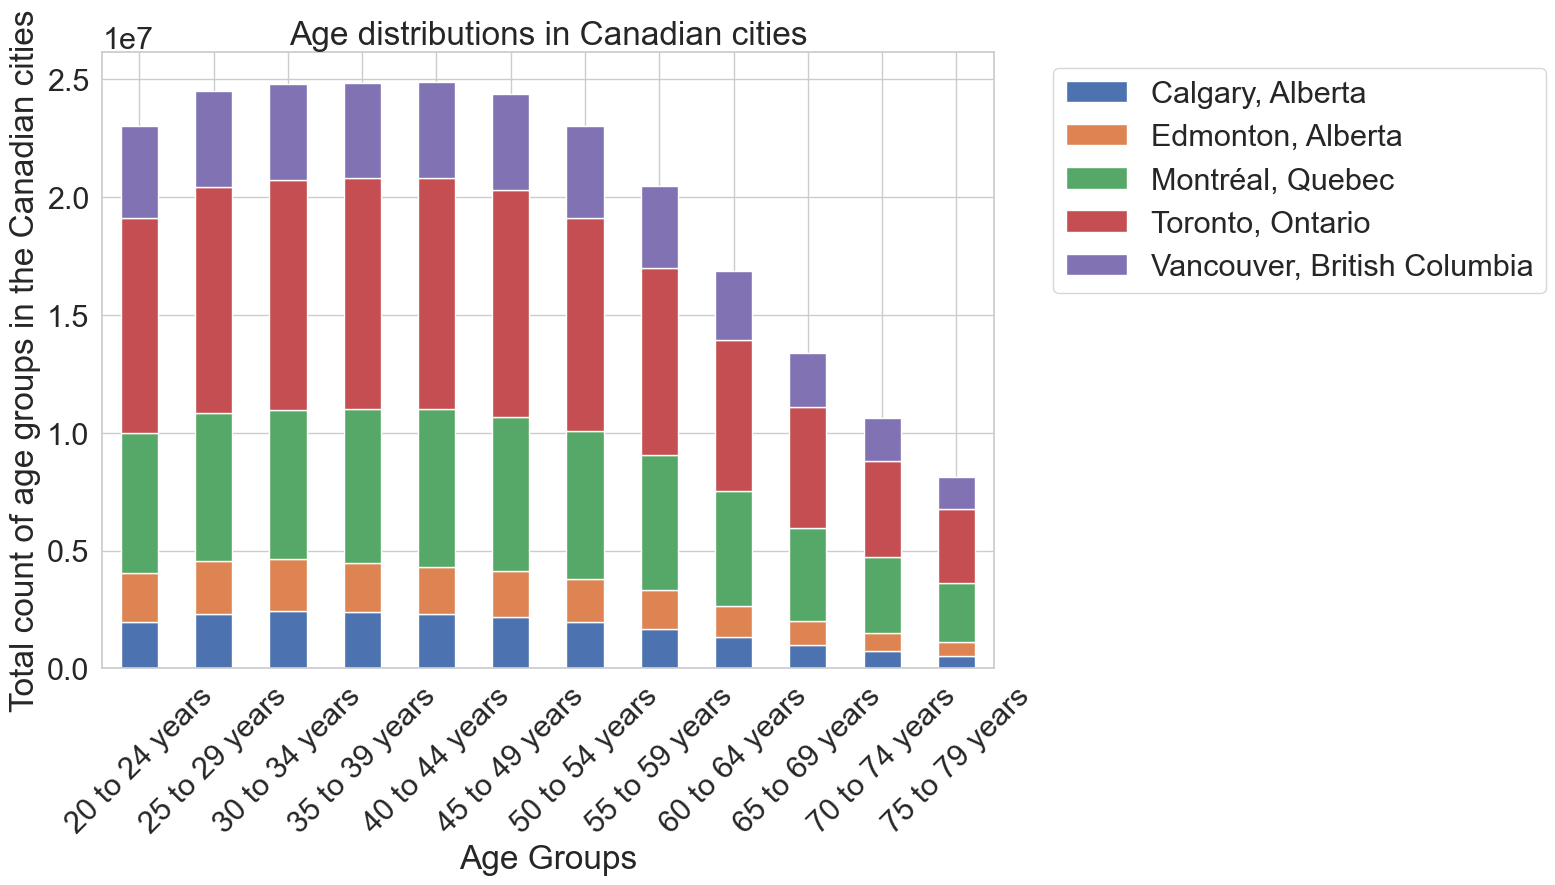

In [12]:
grouped_df = filtered_df.groupby(['Age group', 'GEO'])['VALUE'].sum().reset_index()
pivoted_df = grouped_df.pivot(index='Age group', columns='GEO', values='VALUE')
pivoted_df.plot(kind='bar', stacked=True, figsize=(11.5, 8))

plt.xlabel("Age Groups")
plt.ylabel("Total count of age groups in the Canadian cities")
plt.xticks(rotation=45)
plt.title('Age distributions in Canadian cities')

g.legend_out = False
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From this stacked bar chart, I can gather that the highest total count of age groups in Vancouver than all the other canadian cities. The lowest total count of age groups would be in Calgary. 